In [173]:
import numpy as np
import pandas as pd
# will be using pandas for data analysis part, data processing

import matplotlib.pylab as plt
# for data visualisation

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline 
# so that everything opens in nb here only, and not in seperate windows

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6


In [174]:
Year = 2016
RMNO = 588
Crop = 'Canola'

In [175]:
df = pd.read_csv("data/rm-yields-data.csv")

In [176]:
#create a new dataframe that contains the mean yield for each crop in each RM
df_merged = df

In [177]:
#group by RMNO and Crop and take the mean of the yield
df_merged = df_merged.groupby(['RM', 'Canola']).mean()

#reset the index
df_merged = df_merged.reset_index()



In [178]:
# adjust the decimal places to 2
df_merged = df_merged.round(1)

In [179]:
print(df_merged.isna().sum())
# Check for missing values
print("Missing values:", df_merged.isnull().sum().sum())

# Check for duplicates
print("Number of duplicates:", df_merged.duplicated().sum())

RM                  0
Canola              0
Year                0
Winter Wheat     8883
Spring Wheat       37
Mustard          7622
Durum            3380
Sunflowers      10861
Oats              830
Lentils          6670
Peas             4186
Barley            129
Fall Rye         5157
Canary Seed      8170
Spring Rye      10996
Tame Hay         8293
Flax             1820
Chickpeas       10848
dtype: int64
Missing values: 87882
Number of duplicates: 0


In [180]:
df = df_merged

In [181]:
# create a new variable called dataset from the dataframe df_merged for the RM 588
dataset = df[df['RM'] == RMNO]
dataset.head()

,RM,Canola,Year,Winter Wheat,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas
11668,588,7.0,1973.0,NaN,18.0,NaN,NaN,NaN,40.0,NaN,NaN,15.0,28.0,NaN,NaN,NaN,NaN,NaN
11669,588,8.1,2002.0,20.0,15.8,NaN,10.0,NaN,35.9,300.0,11.4,28.6,20.0,NaN,NaN,NaN,10.0,NaN
11670,588,11.0,1975.0,NaN,32.0,NaN,NaN,NaN,47.0,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN
11671,588,14.0,1971.0,NaN,32.0,NaN,NaN,NaN,58.0,NaN,NaN,43.0,24.0,NaN,NaN,NaN,NaN,NaN
11672,588,15.0,1972.0,NaN,26.5,NaN,NaN,NaN,57.5,NaN,NaN,27.5,24.0,NaN,NaN,NaN,10.0,NaN


In [182]:
# Transform the data type of the Year column in the rm_crop_yields to datetime
dataset['Year'] = pd.to_datetime(dataset['Year'], format='%Y', infer_datetime_format = True)

# in the Year column, extract the year and store it in a new column called Year
dataset['Year'] = dataset['Year'].dt.year

indexedDataset = dataset.set_index(['Year'])

In [183]:
#Checking the first 5 records of the data set.

from datetime import datetime
indexedDataset.head(5)

,RM,Canola,Winter Wheat,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas
Year,,,,,,,,,,,,,,,,,
1973,588,7.0,NaN,18.0,NaN,NaN,NaN,40.0,NaN,NaN,15.0,28.0,NaN,NaN,NaN,NaN,NaN
2002,588,8.1,20.0,15.8,NaN,10.0,NaN,35.9,300.0,11.4,28.6,20.0,NaN,NaN,NaN,10.0,NaN
1975,588,11.0,NaN,32.0,NaN,NaN,NaN,47.0,NaN,NaN,34.0,NaN,NaN,NaN,NaN,NaN,NaN
1971,588,14.0,NaN,32.0,NaN,NaN,NaN,58.0,NaN,NaN,43.0,24.0,NaN,NaN,NaN,NaN,NaN
1972,588,15.0,NaN,26.5,NaN,NaN,NaN,57.5,NaN,NaN,27.5,24.0,NaN,NaN,NaN,10.0,NaN


In [133]:
#Checking the last 5 records of the data set.
indexedDataset.tail(5)

,RM,Winter Wheat,Canola,Spring Wheat,Mustard,Durum,Sunflowers,Oats,Lentils,Peas,Barley,Fall Rye,Canary Seed,Spring Rye,Tame Hay,Flax,Chickpeas
Year,,,,,,,,,,,,,,,,,
2017,588,0.0,34.1,47.9,0.0,0.0,0.0,87.7,0.0,32.3,52.1,0.0,0.0,0.0,0.0,0.0,0.0
2018,588,0.0,43.7,52.8,0.0,0.0,0.0,87.7,0.0,35.3,71.7,0.0,0.0,0.0,0.0,0.0,0.0
2019,588,0.0,48.1,63.3,0.0,0.0,0.0,98.0,0.0,36.1,83.3,0.0,0.0,0.0,0.0,0.0,0.0
2020,588,0.0,27.5,55.6,0.0,0.0,0.0,69.3,0.0,34.0,67.4,0.0,0.0,0.0,0.0,0.0,0.0
2021,588,0.0,30.2,46.1,0.0,0.0,0.0,50.1,0.0,30.1,65.9,0.0,0.0,0.0,0.0,0.0,0.0


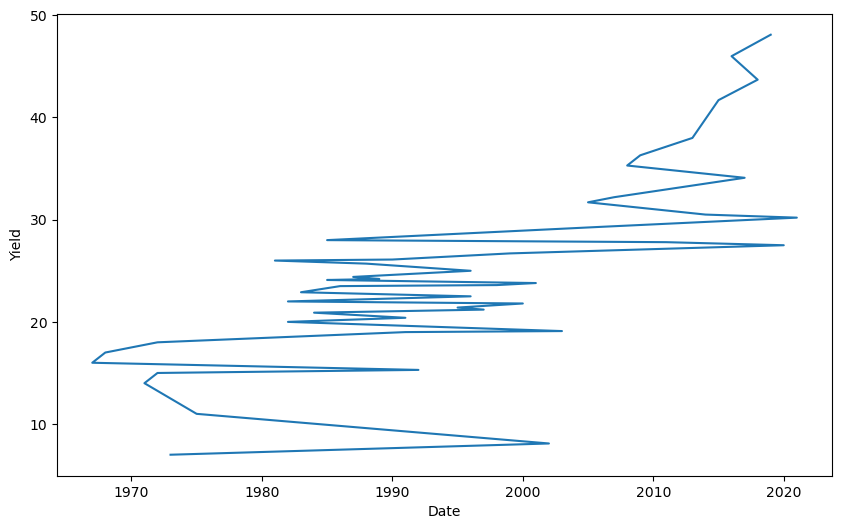

In [187]:
# plot graph

plt.xlabel("Date")
plt.ylabel("Yield")
plt.plot(indexedDataset[Crop])

In [135]:
# Determining rolling statistics
rolmean = indexedDataset[Crop].rolling(window = 12).mean()

rolstd = indexedDataset[Crop].rolling(window = 12).std()
print(rolmean, rolstd)

Year
1938          NaN
1939          NaN
1940          NaN
1941          NaN
1942          NaN
          ...    
2017    34.375000
2018    35.575000
2019    36.900000
2020    36.250000
2021    35.741667
Name: Canola, Length: 84, dtype: float64 Year
1938         NaN
1939         NaN
1940         NaN
1941         NaN
1942         NaN
          ...   
2017    5.930679
2018    6.258249
2019    7.104672
2020    7.603647
2021    7.801335
Name: Canola, Length: 84, dtype: float64


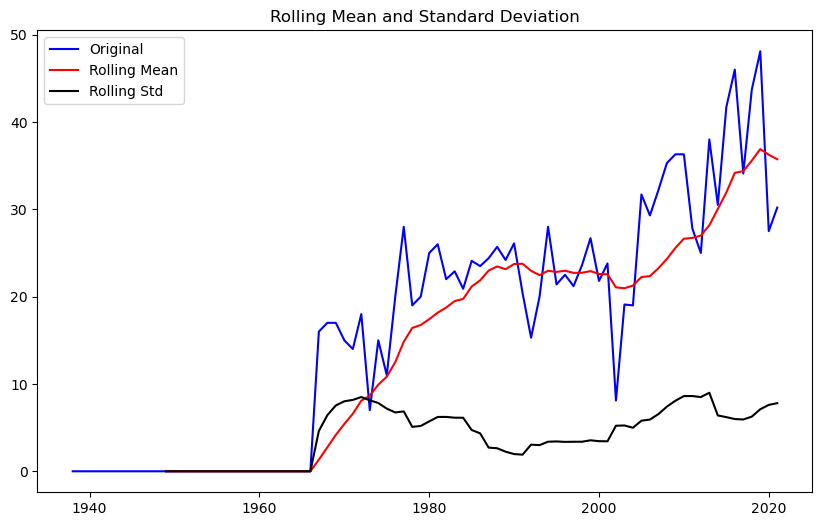

In [136]:
# Plot rolling statistic

orig = plt.plot(indexedDataset[Crop], color = 'blue', label = 'Original')
mean = plt.plot(rolmean, color = 'Red', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'Black', label = 'Rolling Std')
plt.legend(loc ='best')
plt.title('Rolling Mean and Standard Deviation')
plt.show(block=False)

In [137]:
# Perform Dickey- Fuller test
from statsmodels.tsa.stattools import adfuller

print('Results of Dickey-Fuller Test: ')
dftest = adfuller(indexedDataset[Crop], autolag = 'AIC')
#Akaike Information Criterion (AIC) or Bayesian Information Criteria (BIC) to determine how many lags to consider

dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags used', 'Number of observations used'])
for key, value in dftest[4].items():
    dfoutput['Critical Value (%s)' %key] = value
    
print(dfoutput)

Results of Dickey-Fuller Test: 
Test Statistic                 -0.561936
p-value                         0.879353
#Lags used                     10.000000
Number of observations used    73.000000
Critical Value (1%)            -3.523284
Critical Value (5%)            -2.902031
Critical Value (10%)           -2.588371
dtype: float64


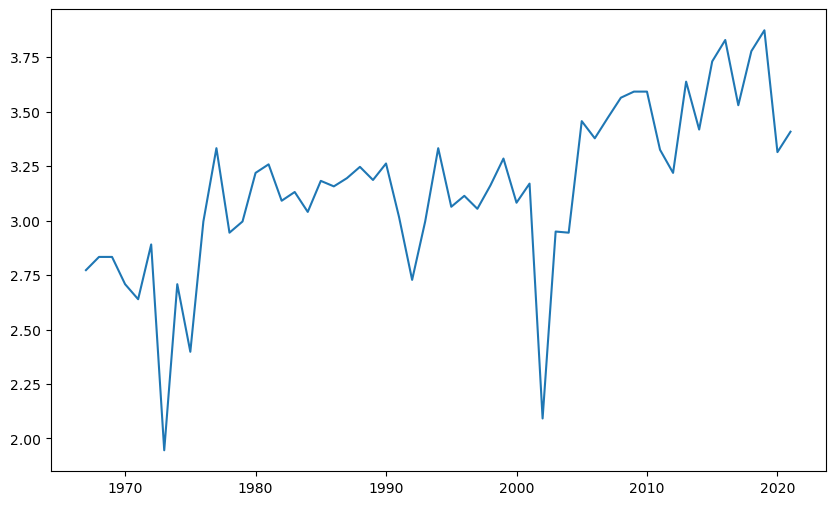

In [138]:
#Estimating the trend
indexedDataset_logscale = np.log(indexedDataset[Crop])
plt.plot(indexedDataset_logscale)

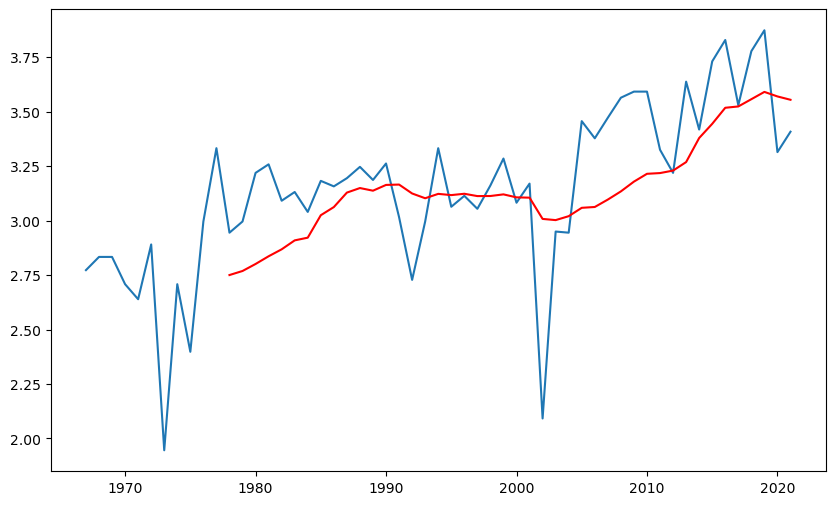

In [139]:
movingAverage = indexedDataset_logscale.rolling(window = 12).mean()
movingSTD = indexedDataset_logscale.rolling(window = 12).std()
plt.plot(indexedDataset_logscale)
plt.plot(movingAverage, color= 'red')

In [140]:
#difference between moving average and actual number of passengers

datasetlogscaleminusmovingaverage = indexedDataset_logscale - movingAverage
datasetlogscaleminusmovingaverage.head(12)

#Remove Nan values
datasetlogscaleminusmovingaverage.dropna(inplace = True)
datasetlogscaleminusmovingaverage.head(10)

Year
1978    0.194378
1979    0.227076
1980    0.418081
1981    0.421895
1982    0.222925
1983    0.222013
1984    0.118177
1985    0.157615
1986    0.094991
1987    0.066183
Name: Canola, dtype: float64

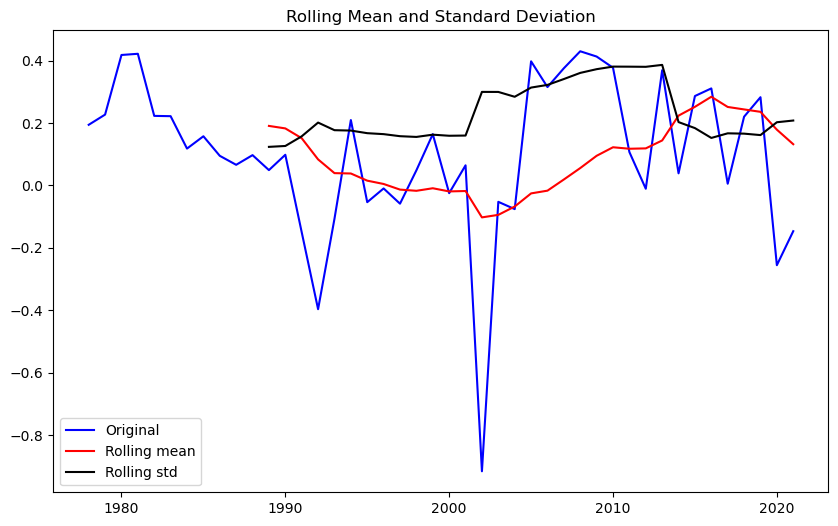

Results of Dickey-Fuller Test: 
Test Statistic                 -4.246065
p-value                         0.000550
#Lags used                      0.000000
Number of observations used    43.000000
Critical Value (1%)            -3.592504
Critical Value (5%)            -2.931550
Critical Value (10%)           -2.604066
dtype: float64


In [141]:
#perfoming the whole dickey-fuller test in order to determine whether the data is stationary or not

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determining rolling statistics
    movingAverage = timeseries.rolling(window = 12).mean()
    movingSTD = timeseries.rolling(window = 12).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color = 'blue', label = 'Original')
    mean = plt.plot(movingAverage, color = 'red', label = 'Rolling mean')
    std = plt.plot(movingSTD, color = 'black', label = 'Rolling std')
    plt.legend(loc = 'best')
    plt.title('Rolling Mean and Standard Deviation')
    plt.show(block = False)
    
    #Perform Dickey Fuller test:
    print('Results of Dickey-Fuller Test: ')
    dftest = adfuller(timeseries, autolag = 'AIC')
    dfoutput = pd.Series(dftest[0:4], index = ['Test Statistic', 'p-value', '#Lags used', 'Number of observations used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)' %key] = value
    print(dfoutput)
    
test_stationarity(datasetlogscaleminusmovingaverage)

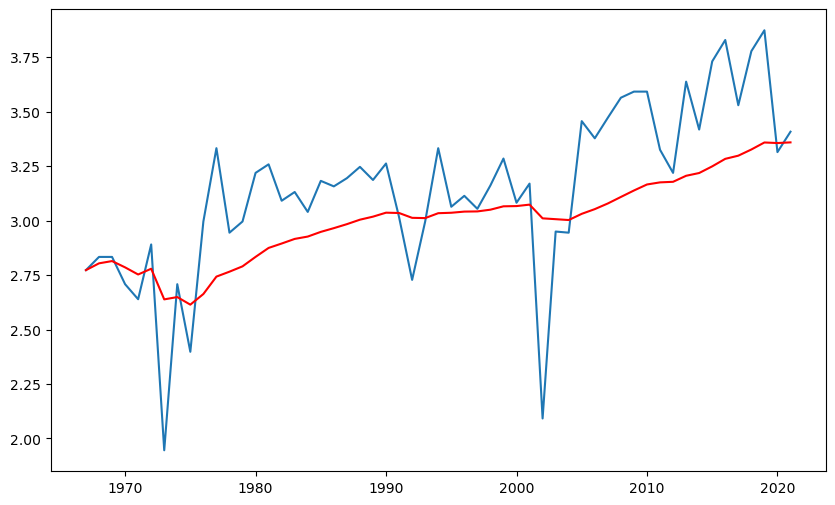

In [142]:
#Calculating weighted average of time series

expodentialDecayWeightedAverage = indexedDataset_logscale.ewm(halflife = 12, min_periods = 0, adjust = True).mean()
plt.plot(indexedDataset_logscale)
plt.plot(expodentialDecayWeightedAverage, color = 'Red')

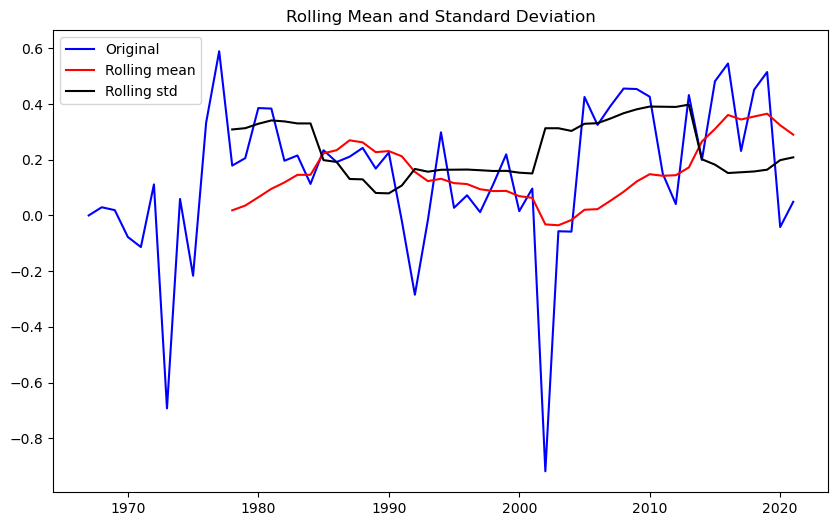

Results of Dickey-Fuller Test: 


MissingDataError: exog contains inf or nans

In [143]:
#We use weighted mean to check for stationarity

datasetLogScaleMinusMovingAverageExpodentialDecayAverage = indexedDataset_logscale - expodentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingAverageExpodentialDecayAverage)

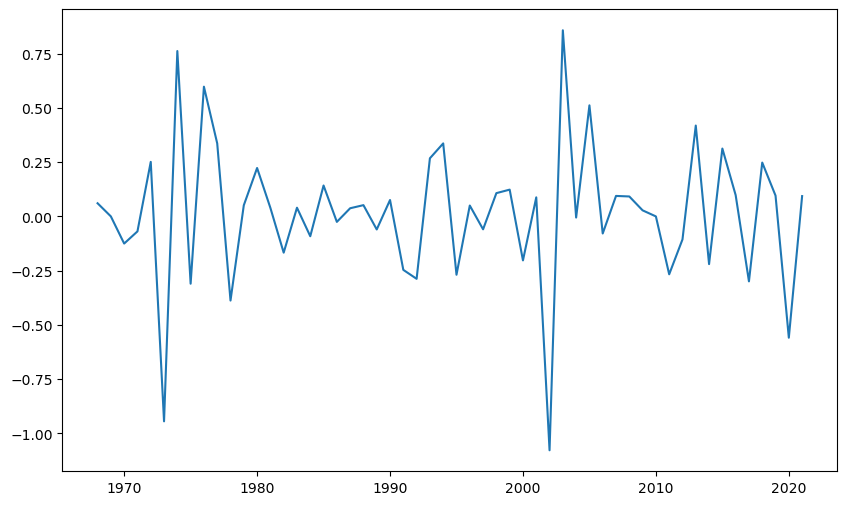

In [144]:
#We now shift the values in time series to use them in forecasting

datasetLogdiffShifting = indexedDataset_logscale - indexedDataset_logscale.shift()
plt.plot(datasetLogdiffShifting)

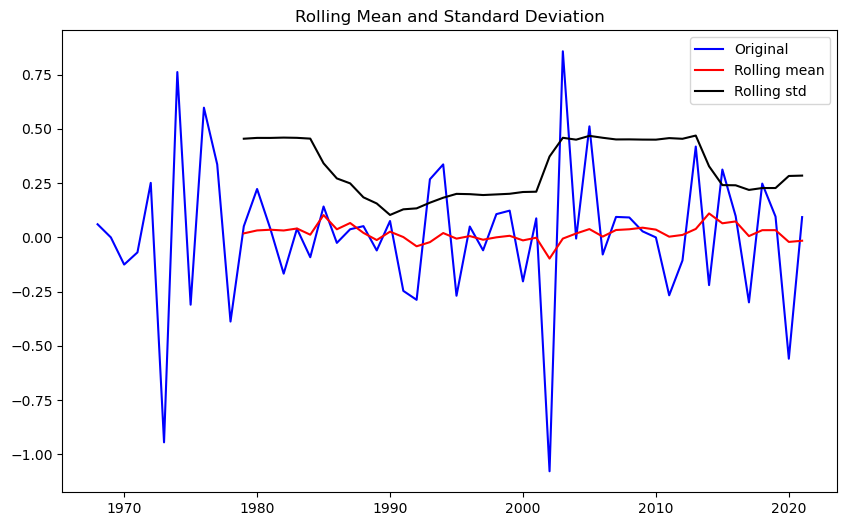

Results of Dickey-Fuller Test: 


LinAlgError: SVD did not converge

In [145]:
#dropping nan values

datasetLogdiffShifting.dropna(inplace = True)
test_stationarity(datasetLogdiffShifting)

In [146]:
from statsmodels.tsa.seasonal import seasonal_decompose
indexedDataset_logscale.index = pd.to_datetime(indexedDataset_logscale)
indexedDataset_logscale.drop(columns=['Year'], inplace=True)

In [147]:
#Breaking down the 3 components of the log scale series using a system library function.

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(indexedDataset_logscale)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(indexedDataset_logscale, label = 'Original')
plt.legend(loc = 'best')

plt.subplot(412)
plt.plot(trend, label = 'Trend')
plt.legend(loc = 'best')

plt.subplot(413)
plt.plot(seasonal, label = 'Seasonality')
plt.legend(loc = 'best')

plt.subplot(414)
plt.plot(residual, label = 'Residual')
plt.legend(loc = 'best')
plt.tight_layout()

decomposedLogdata = residual
decomposedLogdata.dropna(inplace = True)

ValueError: This function does not handle missing values

In [40]:
#Dropping the Nan values:

decomposedLogdata = residual
decomposedLogdata.dropna(inplace = True)

NameError: name 'residual' is not defined